# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил:6306,Бамбурова Мария Владимировна

In [ ]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import plotly.express as px
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, f1_score,classification_report, confusion_matrix

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset='https://www.kaggle.com/datasets/deepu1109/star-dataset'

In [ ]:
import os

In [ ]:
od.download(dataset)

Skipping, found downloaded files in ".\star-dataset" (use force=True to force download)


In [ ]:
data_dir='.\star-dataset'

In [ ]:
os.listdir(data_dir)

['6 class csv.csv']

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('6 class csv.csv')
display(df)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
df1 = df.rename(columns={'Temperature (K)': 'Temperature_K'})
df2=df1.rename(columns={'Luminosity(L/Lo)': 'Luminosity'})
df3=df2.rename(columns={'Radius(R/Ro)': 'Radius'})
df4=df3.rename(columns={'Absolute magnitude(Mv)': 'Absolute_magnitude'})
df5=df4.rename(columns={'Star type': 'Star_type'})
df6=df5.rename(columns={'Star color': 'Star_color'})
df7=df6.rename(columns={'Spectral Class': 'Spectral_Class'})
display(df7)

,Temperature_K,Luminosity,Radius,Absolute_magnitude,Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
print('shape: ', df7.shape)

shape:  (240, 7)


**Датасет содержит характеристики звёзд**

**Цель:**
Цель создания набора данных - доказать, что звезды следуют определенному графику в небесном пространстве,специально называемому диаграммой Герцшпрунга-Рассела или просто HR-диаграммой,чтобы мы могли классифицировать звезды,нанося их характеристики на основе этого графика.

- **Temperature_K** - температуры в Кельвинах
- **Luminosity**- относительная яркость
- **Radius** -относительный радиус
- **Absolute_magnitude** -абсолютная величина - подразумевается "Абсолютная звёздная величина" или блеск объекта
- **Star_color** - цвет
- **Spectral_Class** - спектральный класс
- **Star_type** - тип от 0 до 5:<br>
  **own Dwarf**-> Star Type = 0 <br>
  **Red Dwarf** -> Star Type = 1 <br>
  **White Dwarf**-> Star Type = 2 <br>
  **Main Sequence**-> Star Type = 3 <br>
  **Supergiant** -> Star Type = 4 <br>
  **Hypergiant** -> Star Type = 5<br>

**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

In [ ]:
"""confusion_scores = sklearn.metrics.confusion_matrix( y_test, y_pred )
confusion_df = pd.DataFrame( confusion_scores, columns = iris.target_names, index = iris.target_names )
sns.heatmap( confusion_df, annot = True  )"""

'confusion_scores = sklearn.metrics.confusion_matrix( y_test, y_pred )\nconfusion_df = pd.DataFrame( confusion_scores, columns = iris.target_names, index = iris.target_names )\nsns.heatmap( confusion_df, annot = True  )'

**Классификация (Decision tree)**

Балансировка целевой переменной (тип звезды):

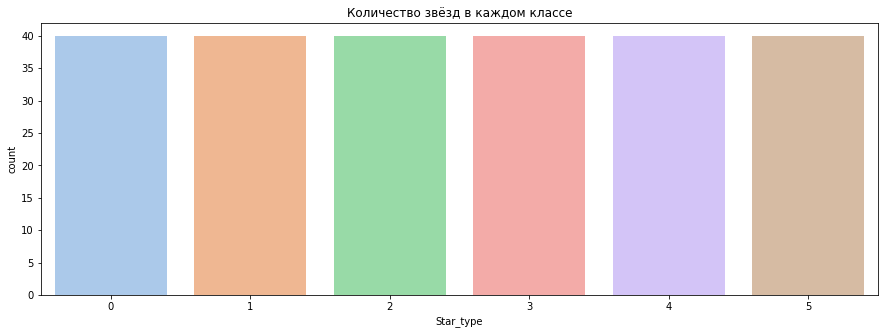

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df7['Star_type'], palette='pastel')
ax.set(title='Количество звёзд в каждом классе')
plt.show()

Вывод: целевая переменная хорошо сбалансирована

**Посмотрим корреляцию между признаками:**

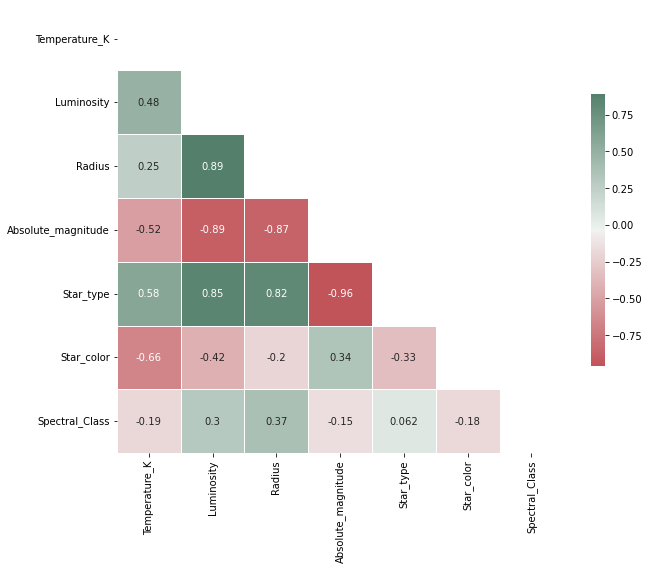

In [ ]:

df7 = pd.DataFrame.from_dict(df7)
df7['Star_type'] = df7['Star_type'].astype('category').cat.codes
df7['Star_color'] = df7['Star_color'].astype('category').cat.codes
df7['Spectral_Class'] = df7['Spectral_Class'].astype('category').cat.codes

corr = df7.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(10, 150, 50, as_cmap=True)
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True)
plt.show()

Вывод: целевая переменная хорошо коррелирует с признаками Luminosity, Radius,Absolute_magnitude

**Параметры для дерева решений**

In [ ]:
 params = dict(max_depth = np.linspace(1, 32, 32, endpoint=True),
                      min_samples_split = np.linspace(0.01, 0.1, 10, endpoint=True),
                      min_samples_leaf = np.linspace(0.01, 0.1, 10, endpoint=True)
                      )

**Поиск лучших гиперпараметров**

In [ ]:
def do_grid_search(model,params, x_train, y_train, x_test, refit='accuracy'):
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
    grid_search = GridSearchCV(model, params, scoring=['accuracy'],
                                n_jobs=4, cv=cv, verbose=3, refit=refit)
    grid_search.fit(x_train.values, y_train.values)
    y_pred = grid_search.predict(x_test.values)
    print('Best params for {}'.format(refit))
    print(grid_search.best_params_)

**Вывод результата**

In [ ]:
def print_result(y_test, pred=None):
  print("результат классификации: \n", classification_report(y_test, pred))
  conf_matrix = confusion_matrix(y_test, pred)
  print("Матрица ошибок: \n", conf_matrix, "\n")
  cmap = sns.diverging_palette(220, 10, 50, as_cmap=True)
  sns.heatmap(conf_matrix, cmap = cmap, annot=True)
  plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df7.drop('Star_type',axis=1), df7['Star_type'], test_size=0.6, random_state=42)

**Без настройки гиперпараметров**

результат классификации: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        24
           4       0.91      1.00      0.95        20
           5       1.00      0.92      0.96        24

    accuracy                           0.99       144
   macro avg       0.98      0.99      0.98       144
weighted avg       0.99      0.99      0.99       144

Матрица ошибок: 
 [[26  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  2 22]] 



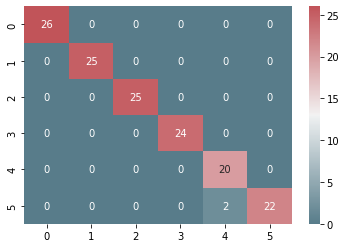

Средняя точность без настройки гиперпараметров:  0.9789473684210526


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print_result(y_test=y_test, pred=predictions)
score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность без настройки гиперпараметров: ', np.mean(score))

Вывод: точность довольно высокая, следовательно настройка гиперпараметров вряд ли даст значительное улучшение.

**Настройка гиперпараметров**

результат классификации: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        24
           4       0.91      1.00      0.95        20
           5       1.00      0.92      0.96        24

    accuracy                           0.99       144
   macro avg       0.98      0.99      0.98       144
weighted avg       0.99      0.99      0.99       144

Матрица ошибок: 
 [[26  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  2 22]] 



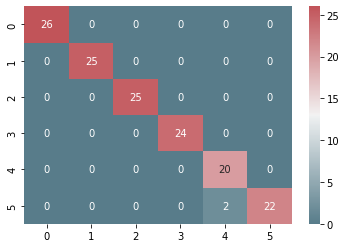

Средняя точность с настройкой гиперпараметров GridSearch:  0.9789473684210526


In [ ]:
dtree_grid = DecisionTreeClassifier(random_state=42, max_depth=4.0, min_samples_leaf=0.01, min_samples_split=0.01)

print_result(y_test=y_test, pred=dtree_grid.fit(X_train, y_train).predict(X_test))
score = cross_val_score(dtree_grid, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность с настройкой гиперпараметров GridSearch: ', np.mean(score))

In [ ]:
max_depth = np.linspace(1, 32, 32, endpoint=True)
accuracy_result = []
cv_result = []
for md in max_depth:
  model = DecisionTreeClassifier(random_state=42, max_depth=md)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_test)
  accuracy_result.append(accuracy_score(y_test, model_pred))
  scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_result.append(np.mean(scores))

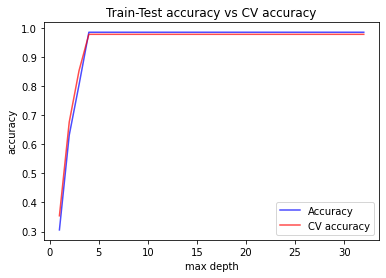

In [ ]:
plt.plot(max_depth, accuracy_result, color='b', label='Accuracy', alpha=0.7)
plt.plot(max_depth, cv_result, color='r', label='CV accuracy', alpha=0.7)
plt.title('Train-Test accuracy vs CV accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()
plt.show()

Вывод: рост точности происходит до глубины 4, далее точность константна.

In [ ]:
accuracy_result_train, accuracy_result_test = [],[]
for md in max_depth:
  model = DecisionTreeClassifier(random_state=42, max_depth=md)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_train)
  accuracy_result_train.append(accuracy_score(y_train, model_pred))

  model.fit(X_test ,y_test)
  model_pred = model.predict(X_test)
  accuracy_result_test.append(accuracy_score(y_test, model_pred))

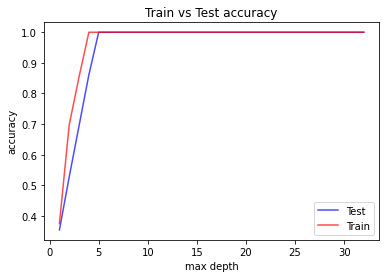

In [ ]:
plt.plot(max_depth, accuracy_result_test, color='b', label='Test', alpha=0.7)
plt.plot(max_depth, accuracy_result_train, color='r', label='Train', alpha=0.7)
plt.title('Train vs Test accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()
plt.show()


Вывод: такой же результат дала настройка гиперпараметров поиском по сетке.
Следовательно, значение max_depth выдаёт максимальную точность 4.

**Масштабирование признаков**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

результат классификации: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        24
           4       0.91      1.00      0.95        20
           5       1.00      0.92      0.96        24

    accuracy                           0.99       144
   macro avg       0.98      0.99      0.98       144
weighted avg       0.99      0.99      0.99       144

Матрица ошибок: 
 [[26  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  2 22]] 



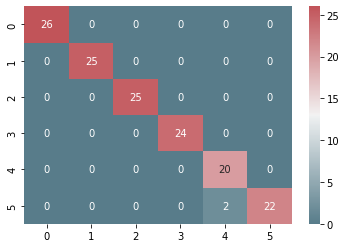

Средняя точность с масштабируемыми признаками:  0.9789473684210526


In [ ]:
dtree_scaled = DecisionTreeClassifier(random_state=42)

print_result(y_test=y_test, pred=dtree_scaled.fit(X_train_scaled, y_train).predict(X_test_scaled))
score = cross_val_score(dtree_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('Средняя точность с масштабируемыми признаками: ', np.mean(score))

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

**Описание данных**

Набор данных: классификация качества вина<br>
Этот набор данных содержит информацию, касающуюся красного вина, различных факторов, влияющих на качество.<br>

Входные переменные (на основе физико-химических тестов):<br>

1-(fixed acidity)-**фиксированная кислотность**<br>
2-(volatile acidity)-**летучая кислотность**<br>
3-(citric acid)-**лимонная кислота**<br>
4-(residual sugar)-**остаточный сахар**<br>
5-(chlorides)-**хлориды**<br>
6-(free sulfur dioxide)-**свободный диоксид серы**<br>
7-(total sulfur dioxide)-**диоксид серы общий**<br>
8-(density)-**плотность**<br>
9-(pH)-**pH**<br>
10-(sulphates)-**сульфаты**<br>
11-( alcohol)-**алкоголь**<br>
Выходная переменная (на основе сенсорных данных):<br>

качество («хорошо» и «плохо» по баллам> 5 и <5)<br>
'good' and 'bad' based on score >5 and <5



In [ ]:
 !pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset_w = 'https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification'

In [ ]:
import os

In [ ]:
od.download(dataset_w)

Skipping, found downloaded files in ".\wine-quality-binary-classification" (use force=True to force download)


In [ ]:
data_dir_w ='.\wine-quality-binary-classification'

In [ ]:
os.listdir(data_dir_w)

['wine.csv']

In [ ]:
import pandas as pd

In [ ]:
df_ww = pd.read_csv('wine.csv')

In [ ]:
display(df_ww)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


**Классификация (Логистическая регрессия)**

In [ ]:
df_ww = df_ww.replace(['good', 'bad'], [0,1])
target = df_ww.quality
features = df_ww.drop(['quality'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=True)

**Без настройки гиперпараметров**

результат классификации: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       267
           1       0.68      0.73      0.70       213

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.72      0.73       480

Матрица ошибок: 
 [[193  74]
 [ 58 155]] 



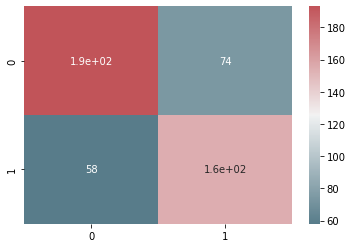

In [ ]:
lr = LogisticRegression(random_state=42, solver='newton-cg')
lr.fit(X_train ,y_train)
lr_pred = lr.predict(X_test)

print_result(y_test=y_test, pred=lr_pred)


In [ ]:
scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Средняя оценка точности: ', np.mean(scores))

Средняя оценка точности:  0.7560898462524023


**С настройкой**

In [ ]:
penalties = ['l2', 'none']
accuracy_result = []
cv_result = []
for penalty in penalties:
  # для 'newton-cg' возможно испльзование только 'l2' или 'none' в качестве параметров
  model = LogisticRegression(random_state=42, solver='newton-cg', penalty=penalty)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_test)
  accuracy_result.append(accuracy_score(y_test, model_pred))
  scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_result.append(np.mean(scores))

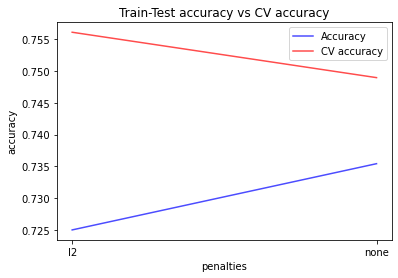

In [ ]:
plt.plot(penalties, accuracy_result, color='b', label='Accuracy', alpha=0.7)
plt.plot(penalties, cv_result, color='r', label='CV accuracy', alpha=0.7)
plt.title('Train-Test accuracy vs CV accuracy')
plt.legend()
plt.xlabel('penalties'); plt.ylabel('accuracy')
plt.show()

Вывод: Точность по оценке train-test без регуляризации (штрафа) даёт лучший результат, но если использовать в качестве оценки алгоритма кросс-валидацию, то с использованием L2-регуляризации точность алгоритма имеет максимальное значение.

In [ ]:
accuracy_result_train, accuracy_result_test = [],[]
for penalty in penalties:
  model = LogisticRegression(random_state=42, solver='newton-cg', penalty=penalty)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_train)
  accuracy_result_train.append(accuracy_score(y_train, model_pred))

  model.fit(X_test ,y_test)
  model_pred = model.predict(X_test)
  accuracy_result_test.append(accuracy_score(y_test, model_pred))

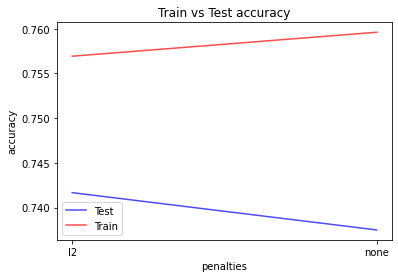

In [ ]:
plt.plot(penalties, accuracy_result_test, color='b', label='Test', alpha=0.7)
plt.plot(penalties, accuracy_result_train, color='r', label='Train', alpha=0.7)
plt.title('Train vs Test accuracy')
plt.xlabel('penalties'); plt.ylabel('accuracy')
plt.legend()
plt.show()

**Масштабирование признаков**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

результат классификации: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       267
           1       0.69      0.74      0.71       213

    accuracy                           0.74       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.74      0.74       480

Матрица ошибок: 
 [[196  71]
 [ 56 157]] 



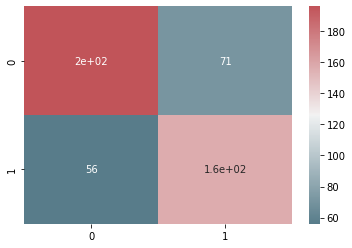

In [ ]:
lr = LogisticRegression(random_state=42, solver='newton-cg')
lr.fit(X_train_scaled ,y_train)
lr_pred = lr.predict(X_test_scaled)

print_result(y_test=y_test, pred=lr_pred)

In [ ]:
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print('Средняя оценка точности: ', np.mean(scores))

Средняя оценка точности:  0.7498478539397821


Вывод: С использованием масштабирования признаков точность алгоритма уменьшилась.

**Настройка гиперпараметров**

In [ ]:
params={"C":[*np.arange(0,1,0.01)], "penalty":["none","l2"]}
do_grid_search(model=lr,  params=params, x_train=X_train, y_train=y_train, x_test=X_test)

результат классификации: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       267
           1       0.66      0.69      0.68       213

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

Матрица ошибок: 
 [[192  75]
 [ 65 148]] 



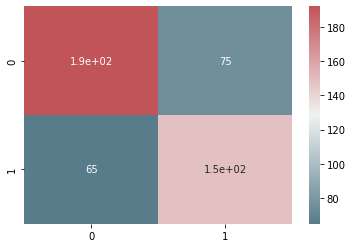

Средняя точность с настройкой гиперпараметров GridSearch:  0.7587604099935938


In [ ]:
lr = LogisticRegression(C=.34,penalty="l2")
lr.fit(X_train,y_train)

print_result(y_test=y_test, pred=lr.fit(X_train, y_train).predict(X_test))
score = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность с настройкой гиперпараметров GridSearch: ', np.mean(score))

Вывод: С настройкой гиперпараметров точность алгоритма увеличались на ~0.002